In [55]:
import pandas as pd 
import matplotlib.pyplot as plt
import yfinance as yf

In [56]:
apple='AAPL'
df=yf.download(apple,start='2021-01-01', end='2023-06-1', period='1d')['Close']

[*********************100%***********************]  1 of 1 completed


In [57]:
df

Date
2021-01-04    129.410004
2021-01-05    131.009995
2021-01-06    126.599998
2021-01-07    130.919998
2021-01-08    132.050003
                 ...    
2023-05-24    171.839996
2023-05-25    172.990005
2023-05-26    175.429993
2023-05-30    177.300003
2023-05-31    177.250000
Name: Close, Length: 606, dtype: float64

In [58]:
df.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 606 entries, 2021-01-04 to 2023-05-31
Series name: Close
Non-Null Count  Dtype  
--------------  -----  
606 non-null    float64
dtypes: float64(1)
memory usage: 9.5 KB


In [59]:
def plot(x):
    plt.figure(figsize=(10, 3))
    plt.plot(x)
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.grid(True)
    plt.show()
    
def plot2(x,y):
    plt.figure(figsize=(10, 3))
    plt.plot(x)
    plt.plot(y)
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.grid(True)
    plt.show()

def plot3(x,y,z):
    plt.figure(figsize=(10, 3))
    plt.plot(x)
    plt.plot(y)
    plt.plot(z)
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.grid(True)
    plt.show()

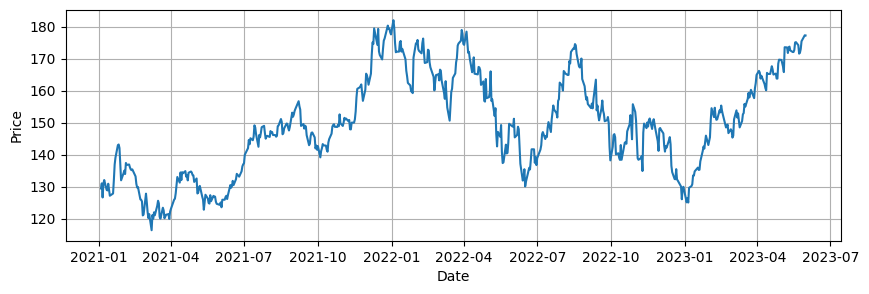

In [60]:
plot(df)

In [61]:
rolling_mean=df.rolling(window=7).mean()
rolling_mean

Date
2021-01-04           NaN
2021-01-05           NaN
2021-01-06           NaN
2021-01-07           NaN
2021-01-08           NaN
                 ...    
2023-05-24    173.224287
2023-05-25    173.355715
2023-05-26    173.747142
2023-05-30    174.068571
2023-05-31    174.367142
Name: Close, Length: 606, dtype: float64

In [62]:
rolling_mean.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 606 entries, 2021-01-04 to 2023-05-31
Series name: Close
Non-Null Count  Dtype  
--------------  -----  
600 non-null    float64
dtypes: float64(1)
memory usage: 9.5 KB


In [63]:
rolling_max=df.rolling(window=7).max()
rolling_min=df.rolling(window=7).min()

rolling_max

Date
2021-01-04           NaN
2021-01-05           NaN
2021-01-06           NaN
2021-01-07           NaN
2021-01-08           NaN
                 ...    
2023-05-24    175.160004
2023-05-25    175.160004
2023-05-26    175.429993
2023-05-30    177.300003
2023-05-31    177.300003
Name: Close, Length: 606, dtype: float64

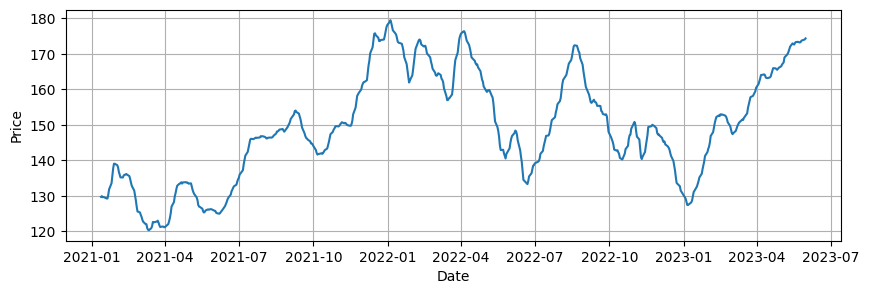

In [64]:
plot(rolling_mean)

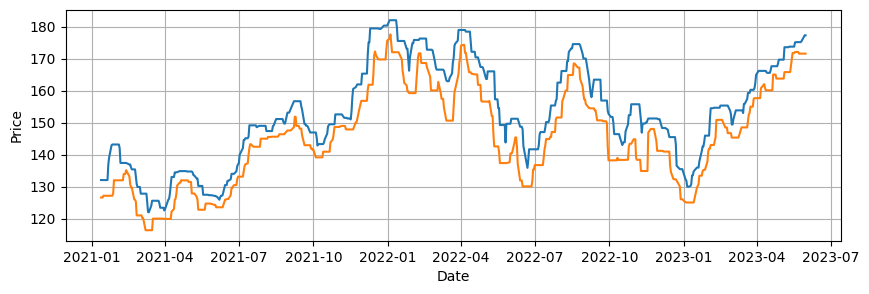

In [65]:
plot2(rolling_max,rolling_min)

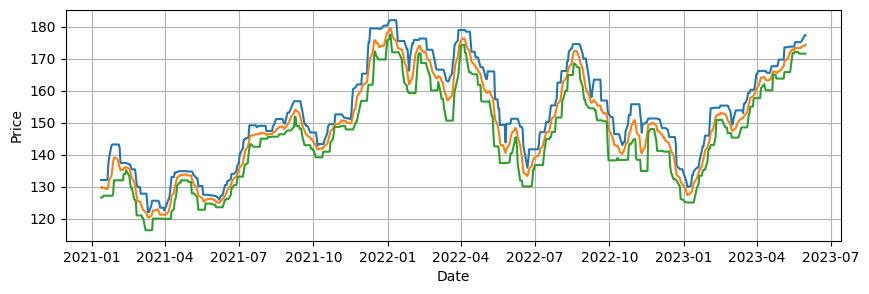

In [66]:
plot3(rolling_max,rolling_mean,rolling_min)

## shifting

In [67]:
df.shift(2)

Date
2021-01-04           NaN
2021-01-05           NaN
2021-01-06    129.410004
2021-01-07    131.009995
2021-01-08    126.599998
                 ...    
2023-05-24    174.199997
2023-05-25    171.559998
2023-05-26    171.839996
2023-05-30    172.990005
2023-05-31    175.429993
Name: Close, Length: 606, dtype: float64

In [68]:
df.shift(-1)

Date
2021-01-04    131.009995
2021-01-05    126.599998
2021-01-06    130.919998
2021-01-07    132.050003
2021-01-08    128.979996
                 ...    
2023-05-24    172.990005
2023-05-25    175.429993
2023-05-26    177.300003
2023-05-30    177.250000
2023-05-31           NaN
Name: Close, Length: 606, dtype: float64

In [69]:
df=pd.DataFrame(df)
df

,Close
Date,
2021-01-04,129.410004
2021-01-05,131.009995
2021-01-06,126.599998
2021-01-07,130.919998
2021-01-08,132.050003
...,...
2023-05-24,171.839996
2023-05-25,172.990005
2023-05-26,175.429993


In [70]:
df["5day % return"]=((df['Close']-df['Close'].shift(5))*100)/df['Close'].shift(5)
df.head(10)

,Close,5day % return
Date,,
2021-01-04,129.410004,NaN
2021-01-05,131.009995,NaN
2021-01-06,126.599998,NaN
2021-01-07,130.919998,NaN
2021-01-08,132.050003,NaN
2021-01-11,128.979996,-0.332283
2021-01-12,128.800003,-1.686888
2021-01-13,130.889999,3.388626
2021-01-14,128.910004,-1.535285


In [71]:
df.index # here frequency is None (it should be 'B')

DatetimeIndex(['2021-01-04', '2021-01-05', '2021-01-06', '2021-01-07',
               '2021-01-08', '2021-01-11', '2021-01-12', '2021-01-13',
               '2021-01-14', '2021-01-15',
               ...
               '2023-05-17', '2023-05-18', '2023-05-19', '2023-05-22',
               '2023-05-23', '2023-05-24', '2023-05-25', '2023-05-26',
               '2023-05-30', '2023-05-31'],
              dtype='datetime64[ns]', name='Date', length=606, freq=None)

In [42]:
  idx=pd.date_range(start='2021-01-04',end="2023-05-31",freq='C')
idx

DatetimeIndex(['2021-01-04', '2021-01-05', '2021-01-06', '2021-01-07',
               '2021-01-08', '2021-01-11', '2021-01-12', '2021-01-13',
               '2021-01-14', '2021-01-15',
               ...
               '2023-05-18', '2023-05-19', '2023-05-22', '2023-05-23',
               '2023-05-24', '2023-05-25', '2023-05-26', '2023-05-29',
               '2023-05-30', '2023-05-31'],
              dtype='datetime64[ns]', length=628, freq='C')

In [72]:
df=df[['Close']]

In [76]:
df

,Close
Date,
2021-01-04,129.410004
2021-01-05,131.009995
2021-01-06,126.599998
2021-01-07,130.919998
2021-01-08,132.050003
...,...
2023-05-24,171.839996
2023-05-25,172.990005
2023-05-26,175.429993


In [74]:
# df.index=pd.date_range(start='2021-01-04',end="2023-05-31",freq='c')
# dfprint(my_range.difference(df['Date']))

In [80]:
df.index

DatetimeIndex(['2021-01-04', '2021-01-05', '2021-01-06', '2021-01-07',
               '2021-01-08', '2021-01-11', '2021-01-12', '2021-01-13',
               '2021-01-14', '2021-01-15',
               ...
               '2023-05-17', '2023-05-18', '2023-05-19', '2023-05-22',
               '2023-05-23', '2023-05-24', '2023-05-25', '2023-05-26',
               '2023-05-30', '2023-05-31'],
              dtype='datetime64[ns]', name='Date', length=606, freq=None)

In [79]:
my_range = pd.date_range(
  start="2021-01-04", end="2023-05-31", freq='B')
 
print(my_range.difference(df.index))

DatetimeIndex(['2021-01-18', '2021-02-15', '2021-04-02', '2021-05-31',
               '2021-07-05', '2021-09-06', '2021-11-25', '2021-12-24',
               '2022-01-17', '2022-02-21', '2022-04-15', '2022-05-30',
               '2022-06-20', '2022-07-04', '2022-09-05', '2022-11-24',
               '2022-12-26', '2023-01-02', '2023-01-16', '2023-02-20',
               '2023-04-07', '2023-05-29'],
              dtype='datetime64[ns]', freq=None)


In [47]:
df=df.asfreq("B")